<p style="font-family: Arial; font-size:3em;color:black; font-style:bold">
Classification of Loan Data <br><br>

<p style="font-family: Arial; font-size:2.5em;color:black; font-style:bold">
Data Science Intern Case Study</p>

## Needed libraries, loading data and searching for anomalies

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
data = pd.read_csv('Data Science Case Study.csv')
data.columns

Index(['Name', 'loan_ident', 'Campaign', 'Gender', 'User_ID', 'label',
       'Education_Status', 'Age', 'No_Children', 'referrals', 'Amount',
       'Reason'],
      dtype='object')

Deleting few columns that are clearly not important for our analysis.

In [3]:
del data['Name']
del data['loan_ident']
del data['Campaign']
del data['User_ID']
data.head()

,Gender,label,Education_Status,Age,No_Children,referrals,Amount,Reason
0,male,1,1,0.92,1,2,151.55,S
1,male,1,1,4.00,0,2,81.858,S
2,male,1,1,11.00,1,2,120,S
3,female,1,1,14.00,1,2,120,S
4,female,1,1,15.00,0,1,211.338,S


Checking if any values are NaN (empty). Also some other unusual data (some cells in 'Amount' columns were '-' instead of numeric value thus giving an error when fitting model. Checking for presence of both of these.

In [4]:
data[data.isnull().any(axis=1)]

,Gender,label,Education_Status,Age,No_Children,referrals,Amount,Reason
115,male,0,1,NaN,0,0,27.721,C
119,male,0,1,NaN,0,0,27.721,C
121,female,1,1,38.0,0,0,80,NaN
122,male,0,1,NaN,0,0,227.525,C
123,male,0,1,NaN,0,0,39.6,C
127,male,0,1,NaN,0,0,30.696,C
128,male,0,1,NaN,0,0,25.925,S
129,male,0,1,NaN,0,0,50,S
130,male,0,1,NaN,0,0,31,S
131,male,0,1,NaN,0,0,26,S


In [5]:
data[data['Amount'].str.contains('-')]

,Gender,label,Education_Status,Age,No_Children,referrals,Amount,Reason
43,male,0,1,38.0,0,0,-,S
44,male,0,1,39.0,0,0,-,S
51,male,0,1,40.0,0,0,-,S
136,male,0,1,NaN,0,0,-,S
138,male,0,1,NaN,0,0,-,S
297,male,0,2,NaN,0,0,-,S
300,male,0,2,NaN,0,0,-,S
301,male,0,2,NaN,0,0,-,S
302,male,0,2,NaN,0,0,-,S
305,male,0,2,NaN,0,0,-,S


## Data Manipulation and Feature Engineering

1. Data cleaning to remove rows containing empty values and unusual ( here '-') values using dropna() and str.contain().
2. Also checking how many values were dropped to make sure it did not take out significant amount of data.

In [6]:
before_rows = data.shape[0]
print('Before:', before_rows)
data = data.dropna(subset=['Education_Status','Amount','Gender', 'Age', 'No_Children'])
data = data[~data.Amount.str.contains("-") == True]
after_rows = data.shape[0]
print('After:', after_rows)
print('Removed:',before_rows - after_rows)

Before: 891
After: 707
Removed: 184


1. Converting Gender into Booleans and then 0 and 1 as strings 'male' and 'female' cause error in fitting model(We could keep it True and Flase as well, as python code would run with True as 1 and False as 0 without error when fitting)
2. 'OneHotEncoding' Education Status column using pd.get_dummies
3. Scaled Age and Amount column
4. Modifying No_Childred column for the rows that had >0 kids with less than 21 years.

In [7]:
data['Gender'] = (data['Gender'] == 'female')*1

data['Amount'] = data.Amount.astype(float)
column_to_scale_1 = data.loc[:,['Amount']]
column_to_scale_2 = data.loc[:,['Age']]
stdscl = StandardScaler()
column_scaled_1 = stdscl.fit_transform(column_to_scale_1)
column_scaled_2 = stdscl.fit_transform(column_to_scale_2)
data['Amount_Scaled'] = column_scaled_1[:,[0]]
data['Age_Scaled'] = column_scaled_2[:,[0]]

OHEncode = pd.get_dummies(data['Education_Status'], prefix='Edu_Sta')
data = data.join(OHEncode)

data.No_Children.loc[(data['Age'] < 21) & (data['No_Children']>0)] = 0

data.head(), data.tail()

C:\Users\Home\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


(   Gender  label  Education_Status    Age  No_Children  referrals   Amount  \
 0       0      1                 1   0.92            0          2  151.550   
 1       0      1                 1   4.00            0          2   81.858   
 2       0      1                 1  11.00            0          2  120.000   
 3       1      1                 1  14.00            0          2  120.000   
 4       1      1                 1  15.00            0          1  211.338   
 
   Reason  Amount_Scaled  Age_Scaled  Edu_Sta_1  Edu_Sta_2  Edu_Sta_3  
 0      S       2.197110   -1.974436          1          0          0  
 1      S       0.882902   -1.762731          1          0          0  
 2      S       1.602160   -1.281584          1          0          0  
 3      S       1.602160   -1.075378          1          0          0  
 4      S       3.324555   -1.006643          1          0          0  ,
      Gender  label  Education_Status   Age  No_Children  referrals  Amount  \
 861       0

## Initial Exploration

In [8]:
data.describe()

,Gender,label,Education_Status,Age,No_Children,referrals,Amount,Amount_Scaled,Age_Scaled,Edu_Sta_1,Edu_Sta_2,Edu_Sta_3
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,7.070000e+02,7.070000e+02,707.000000,707.000000,707.000000
mean,0.369165,0.408769,2.237624,29.645219,0.254597,0.435644,35.038054,3.154007e-16,-7.160703e-17,0.258840,0.244696,0.496464
std,0.482920,0.491955,0.836558,14.558872,0.519005,0.856422,53.067178,1.000708e+00,1.000708e+00,0.438308,0.430211,0.500341
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.013000,-5.850512e-01,-2.008803e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000,-5.089240e-01,-6.629667e-01,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.850000,-3.618364e-01,-1.130846e-01,0.000000,0.000000,0.000000
75%,1.000000,1.000000,3.000000,38.000000,0.000000,1.000000,34.198000,-1.584121e-02,5.742681e-01,1.000000,0.000000,1.000000
max,1.000000,1.000000,3.000000,80.000000,3.000000,6.000000,512.329000,9.000457e+00,3.461149e+00,1.000000,1.000000,1.000000


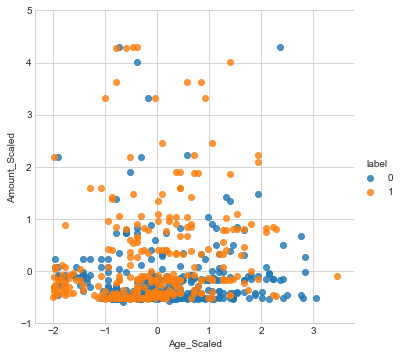

In [9]:
g=sns.lmplot( x="Age_Scaled", y="Amount_Scaled", data=data, fit_reg=False, hue='label', legend=True)
sns.set(rc={'figure.figsize':(15,5)})
g.set(ylim=(-1, 5))

C:\Users\Home\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


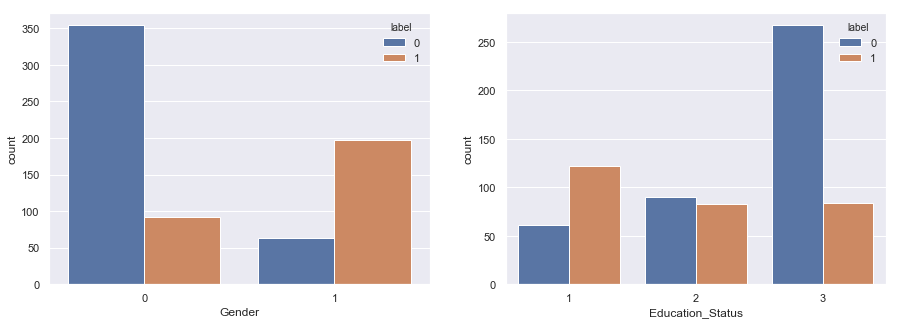

In [10]:
fig, ax =plt.subplots(1,2)
Gender_vs_label = sns.countplot(x="Gender", hue="label", data=data, ax=ax[0]) #Gender coded as 0=Male, 1=Female
EduStatus_vs_label = sns.countplot(x="Education_Status", hue="label", data=data, ax=ax[1])
fig.show()

<bound method Figure.show of <Figure size 1080x360 with 2 Axes>>

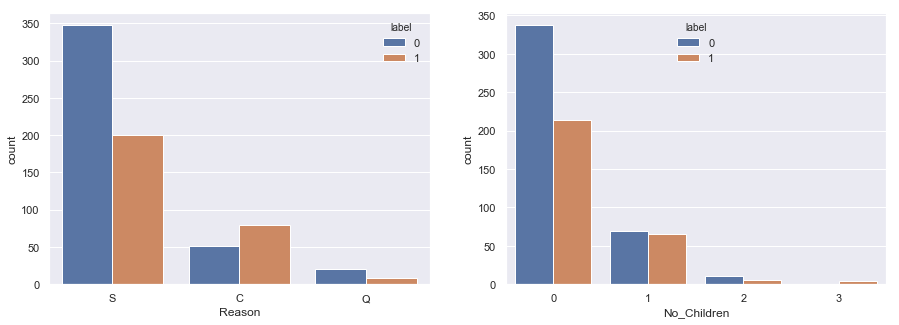

In [11]:
fig, ax =plt.subplots(1,2)
Reason_vs_label = sns.countplot(x="Reason", hue="label", data=data, ax=ax[0])
NoofChild_vs_label = sns.countplot(x="No_Children", hue="label", data=data, ax=ax[1])
fig.show

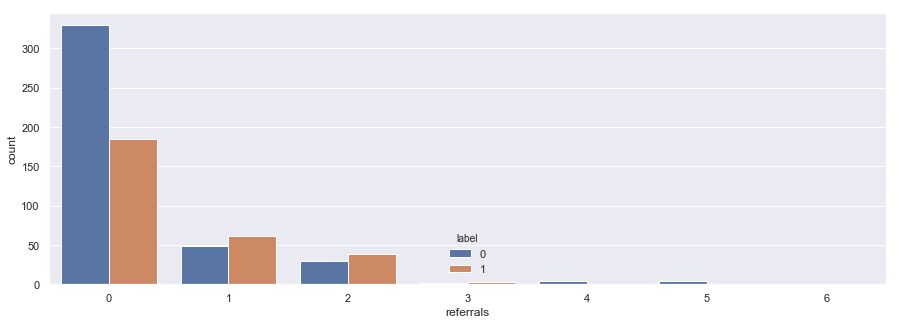

In [12]:
Referrals_vs_label = sns.countplot(x="referrals", hue="label", data=data)

## Creating X and y(target), specifying features and splitting data into train-test

Specifying feature lists to tailor to different algorithms

In [35]:
X = data.copy()
print(X.head())

y=data[['label']].copy()
print(y.head())

applicant_features_1 = ['Edu_Sta_1','Edu_Sta_2','Edu_Sta_3','Amount','Gender', 'Age', 'No_Children']
applicant_features_2 = ['Edu_Sta_1','Edu_Sta_2','Edu_Sta_3','Amount_Scaled','Gender', 'Age_Scaled', 'No_Children']
applicant_features_3 = ['Education_Status','Amount_Scaled','Gender', 'Age_Scaled', 'No_Children']

   Gender  label  Education_Status    Age  No_Children  referrals   Amount  \
0       0      1                 1   0.92            0          2  151.550   
1       0      1                 1   4.00            0          2   81.858   
2       0      1                 1  11.00            0          2  120.000   
3       1      1                 1  14.00            0          2  120.000   
4       1      1                 1  15.00            0          1  211.338   

  Reason  Amount_Scaled  Age_Scaled  Edu_Sta_1  Edu_Sta_2  Edu_Sta_3  
0      S       2.197110   -1.974436          1          0          0  
1      S       0.882902   -1.762731          1          0          0  
2      S       1.602160   -1.281584          1          0          0  
3      S       1.602160   -1.075378          1          0          0  
4      S       3.324555   -1.006643          1          0          0  
   label
0      1
1      1
2      1
3      1
4      1


Splitting our data in Train and Test sets

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_train.head(), y_train.head()

(     Gender  label  Education_Status   Age  No_Children  referrals   Amount  \
 106       0      1                 1  36.0            0          1  512.329   
 810       1      0                 3  43.0            1          6   46.900   
 165       0      1                 1  45.0            0          0   26.550   
 237       1      1                 1  58.0            0          0   26.550   
 384       0      0                 3  19.0            0          0    7.650   
 
     Reason  Amount_Scaled  Age_Scaled  Edu_Sta_1  Edu_Sta_2  Edu_Sta_3  
 106      C       9.000457    0.436798          1          0          0  
 810      S       0.223685    0.917944          0          0          1  
 165      S      -0.160062    1.055415          1          0          0  
 237      S      -0.160062    1.948973          1          0          0  
 384      S      -0.516467   -0.731702          0          0          1  ,
      label
 106      1
 810      0
 165      1
 237      1
 384      0)

## Applying Algorithms

### 1. Decision Trees

In [37]:
tree_1 = DecisionTreeClassifier(max_leaf_nodes=30, random_state=1)
tree_1.fit(X_train[applicant_features_1], y_train)   #fitting model to train data
print(type(tree_1)) 
y_pred_tree1 = tree_1.predict(X_test[applicant_features_1])  #applying fitted model to test data to predict y lable
print(y_pred_tree1[:10])
print('Accuracy Score:', accuracy_score(y_test, y_pred_tree1)) # assessing accuracy 

<class 'sklearn.tree.tree.DecisionTreeClassifier'>
[0 0 0 0 0 0 0 0 0 1]
Accuracy Score: 0.8497652582159625


In [38]:
#Grid Search

tree_GS = DecisionTreeClassifier()
param_grid_tree = {'max_leaf_nodes':[10,15,20,25,30,35], 'random_state': [0,1, 2, 3, 4, 5] }
tree_classfier_GS = GridSearchCV(tree_GS, param_grid_tree)
tree_classfier_GS.fit(X_train[applicant_features_1], y_train.values.ravel())
print('Best Parameters:', tree_classfier_GS.best_params_)

para_fitted_tree = tree_classfier_GS.best_estimator_
print('Train Accuracy with best parameters: ', para_fitted_tree.score(X_train[applicant_features_1], y_train))
print('Test Accuracy with best parameters: ', para_fitted_tree.score(X_test[applicant_features_1], y_test))

Best Parameters: {'max_leaf_nodes': 35, 'random_state': 1}
Train Accuracy with best parameters:  0.902834008097166
Test Accuracy with best parameters:  0.8497652582159625


### 2. Random Forests

In [39]:
forest_1 = RandomForestClassifier(criterion = 'entropy', n_estimators = 40, random_state=1, n_jobs=1)
forest_1.fit(X_train[applicant_features_1], y_train.values.ravel())
print(type(forest_1))
y_pred_forest_1 = forest_1.predict(X_test[applicant_features_1])
print('Accuracy Score:',accuracy_score(y_test, y_pred_forest_1))

<class 'sklearn.ensemble.forest.RandomForestClassifier'>
Accuracy Score: 0.8309859154929577


In [40]:
feature_importances = pd.DataFrame(forest_1.feature_importances_, index = X_train[applicant_features_1].columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

             importance
Age            0.349093
Amount         0.321949
Gender         0.199521
Edu_Sta_3      0.053074
No_Children    0.030732
Edu_Sta_1      0.027321
Edu_Sta_2      0.018310


### 3. Logistic Regression

In [41]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train[applicant_features_2], y_train.values.ravel())
y_prediction_LR = LR.predict(X_test[applicant_features_2])
print(y_prediction_LR[:10])
print('Accuracy Score:', accuracy_score( y_test, y_prediction_LR))

[0 0 0 0 0 0 0 0 0 1]
Accuracy Score: 0.8309859154929577


In [42]:
#Grid Search

LR_GS=LogisticRegression(random_state=0)
param_grid_LR = {'random_state': [0,1,2,3,4,5,6,7,8,9,10] }
grid_classfier_LR = GridSearchCV(LR_GS, param_grid_LR)
grid_classfier_LR.fit(X_train[applicant_features_2], y_train.values.ravel())
print('Best Parameters:', grid_classfier_LR.best_params_)

para_fitted_LR = grid_classfier_LR.best_estimator_
print('Train Accuracy with best parameters: ', para_fitted_LR.score(X_train[applicant_features_2], y_train))
print('Test Accuracy with best parameters: ', para_fitted_LR.score(X_test[applicant_features_2], y_test))

Best Parameters: {'random_state': 0}
Train Accuracy with best parameters:  0.7935222672064778
Test Accuracy with best parameters:  0.8309859154929577


### 3. XGBoost

In [43]:
xgb1 = XGBClassifier()
xgb1.fit(X_train[applicant_features_1], y_train.values.ravel()) #Age and Amount not scaled,when used scaled same performance
preds_XGB1 = xgb1.predict(X_test[applicant_features_1])
print('Accuracy score 1:', accuracy_score(y_test, preds_XGB1))

xgb3 = XGBClassifier()
xgb3.fit(X_train[applicant_features_3], y_train.values.ravel())  #Not scaled, not onehotencoded
preds_XGB3 = xgb3.predict(X_test[applicant_features_3])
print('Accuracy score 3:', accuracy_score( y_test,preds_XGB3))

Accuracy score 1: 0.8403755868544601
Accuracy score 3: 0.8450704225352113


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### 4. Naive Bayes

In [44]:
NB1 = GaussianNB() 
NB1.fit(X_train[applicant_features_1],y_train.values.ravel()) #Age and Amount not scaled,when used scaled same performance
NB1_pred = NB1.predict((X_test[applicant_features_1]))
print(accuracy_score(y_test,NB1_pred))

NB3 = GaussianNB()
NB3.fit(X_train[applicant_features_3],y_train.values.ravel())   #not scaled, not onehotencoded
NB3_pred = NB3.predict((X_test[applicant_features_3]))
print(accuracy_score(y_test,NB3_pred))

0.812206572769953
0.8215962441314554


### 5. Gradient Boosting

In [45]:
GB = GradientBoostingClassifier()
GB.fit(X_train[applicant_features_1],y_train.values.ravel())  #Age and Amount not scaled, no difference in accuracy if used scaled
GB_pred=GB.predict((X_test[applicant_features_1]))
print(accuracy_score(y_test,GB_pred))

GB3 = GradientBoostingClassifier()
GB3.fit(X_train[applicant_features_3],y_train.values.ravel())  #not scaled, not onehotencoded
GB_pred3=GB3.predict((X_test[applicant_features_3]))
print(accuracy_score(y_test,GB_pred3))

0.8403755868544601
0.8450704225352113
